In [7]:
import numpy as np

import matplotlib.pyplot as plt

We'll sample from a Gaussian (Normal) distribution with a given mean (μ) and standard deviation (σ).

In [8]:
# Target probability distribution (normal distribution)

def target_distribution(x):

    return np.exp(-0.5 * x**2) # Standard Normal PDF (without constant)

In [9]:
# Metropolis-Hastings Algorithm

def metropolis_hastings(target_pdf, num_samples=10000, proposal_std=1.0):

    samples = []

    x_current = np.random.randn()  # Start from a random point


    for _ in range(num_samples):

        x_proposed = x_current + np.random.normal(0, proposal_std)  # Gaussian Proposal

        acceptance_ratio = min(1, target_pdf(x_proposed) / target_pdf(x_current))

        if np.random.rand() < acceptance_ratio:

            x_current = x_proposed  # Accept new sample

        samples.append(x_current)

    return np.array(samples)

In [10]:
# Run Metropolis-Hastings

samples = metropolis_hastings(target_distribution, num_samples=10000)

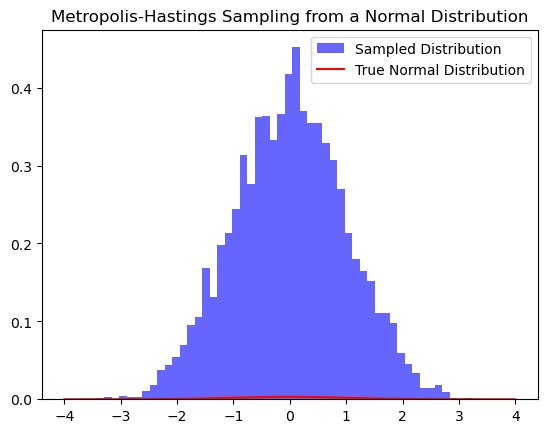

In [11]:
# Plot histogram of samples

plt.hist(samples, 
         bins=50, 
         density=True,
         alpha=0.6, 
         color='b', 
         label="Sampled Distribution")

# Overlay true normal distribution

x = np.linspace(-4, 4, 1000)

plt.plot(x, target_distribution(x)/ np.sum(target_distribution(x)), 'r-', label="True Normal Distribution")

plt.legend()

plt.title("Metropolis-Hastings Sampling from a Normal Distribution")

plt.show()